In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")
session = Session(engine)

In [4]:
inspector = inspect(engine)

In [5]:
inspector.get_table_names()

['Measurements', 'Stations']

In [6]:
columns = inspector.get_columns('Stations')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [7]:
Base = automap_base()

In [8]:
Base.prepare(engine, reflect=True)

In [9]:
Base.classes.keys()

['Measurements', 'Stations']

In [10]:
Measurements = Base.classes.Measurements
Stations = Base.classes.Stations

In [11]:
session = Session(engine)

In [12]:
first_row = session.query(Stations).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12ea8ac4e10>,
 'elevation': 3.0,
 'id': 1,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397'}

In [13]:
items = session.query(Stations)
for item in items:
    print(item.id)
    print(item.name)

1
WAIKIKI 717.2, HI US
2
KANEOHE 838.1, HI US
3
KUALOA RANCH HEADQUARTERS 886.9, HI US
4
PEARL CITY, HI US
5
UPPER WAHIAWA 874.3, HI US
6
WAIMANALO EXPERIMENTAL FARM, HI US
7
WAIHEE 837.5, HI US
8
HONOLULU OBSERVATORY 702.2, HI US
9
MANOA LYON ARBO 785.2, HI US


In [14]:
#Prescipitation Analysis Query
date = dt.datetime(2017, 1, 5)
last_12_mo_precip = session.query(Measurements.date, func.sum(Measurements.prcp)).filter(Measurements.date>=date).order_by(Measurements.date.desc()).group_by(sqlalchemy.func.strftime("%m", Measurements.date)).all()

In [15]:
df = pd.DataFrame(last_12_mo_precip, columns=['End of Month Date', 'Precipitation'])
df.set_index('End of Month Date', inplace=True)


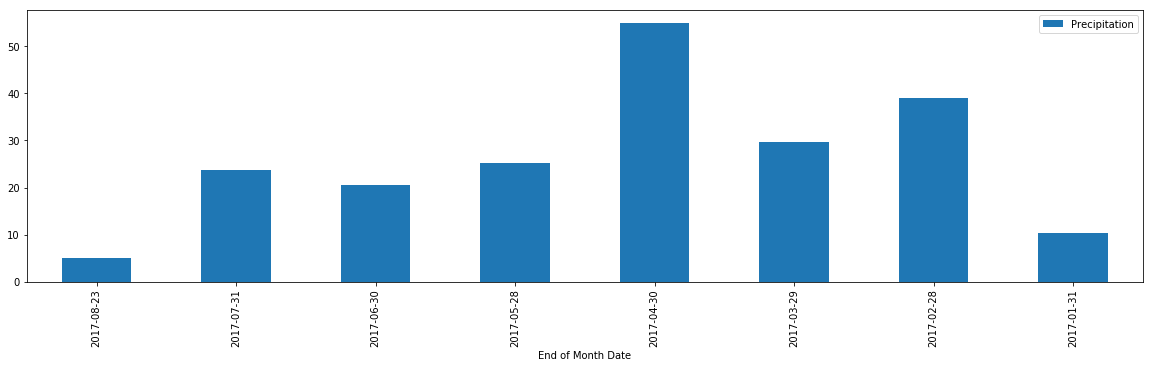

In [16]:
df.plot(figsize=(20,5),kind="bar")
plt.show()

In [17]:
df.describe()

,Precipitation
count,8.000000
mean,26.091250
std,15.722714
min,5.180000
25%,18.002500
50%,24.495000
75%,31.980000
max,54.910000


In [18]:
#Station Analysis Query

#count of # of stations
session.query(func.count(Stations.name)).all()

[(9)]

In [19]:
#query to find most active stations, of which USC00519281 is the most active
session.query(Measurements.station,func.count(Measurements.date)).group_by(Measurements.station).order_by(func.count(Measurements.date).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [20]:
#query to find the top station in terms of tobs occurence of observations over the last 12 months
date = dt.datetime(2017, 1, 5)
session.query(Measurements.station, func.count(Measurements.tobs)).filter(Measurements.date>=date).group_by(Measurements.station).order_by(func.count(Measurements.date).desc()).limit(1).all()

[('USC00519397', 225)]

In [21]:
top_station_data = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date>=date, Measurements.station == 'USC00519397').all()

In [22]:
dftopstation = pd.DataFrame(top_station_data, columns=['End of Month Date', 'Temp'])

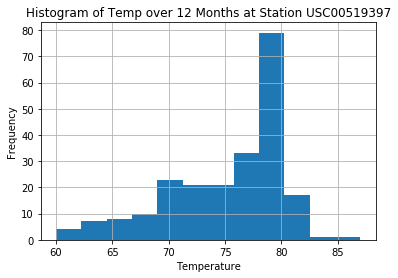

In [23]:
dftopstation.hist(bins=12)
pl.title("Histogram of Temp over 12 Months at Station USC00519397")
pl.xlabel("Temperature")
pl.ylabel("Frequency")
plt.show()

In [24]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
print(calc_temps('2016-01-01', '2017-01-01'))

[(56.0, 74.0718418514947, 84.0)]


In [25]:
values = [56.0, 74.0718418514947, 84.0]
x = np.arange(len(values))
x

array([0, 1, 2])

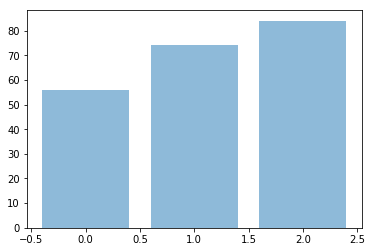

In [26]:
plt.bar(x,values,align='center', alpha=0.5)
plt.show()